In [1]:
from curve_gen import ThrustCurveGenerator, Stats
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
tcg = ThrustCurveGenerator("data/T200-Public-Performance-Data-10-20V-September-2019.xlsx")

In [3]:
# Get the forward PWM and forward thrust values
fwd_pwm, fwd_thrust = tcg.fwd_data[Stats.PWM], tcg.fwd_data[Stats.FORCE]
rev_pwm, rev_thrust = tcg.rev_data[Stats.PWM], tcg.rev_data[Stats.FORCE]

pwms = tcg.data[Stats.PWM]
thrusts = tcg.data[Stats.FORCE]


# Create the bivariate quadratic model
fwd_bivar_params, rev_bivar_params = tcg.find_bivar_coeffs()
inv_bivar_model, fwd_bivar_model = tcg.bivar_thrust_model(fwd_bivar_params, rev_bivar_params)

# Create the linearly-inerpolated quadratic model
fwd_linterp_params, rev_linterp_params = tcg.find_linterp_polys()
inv_linterp_model, fwd_linterp_model = tcg.linterp_thrust_model(fwd_linterp_params, rev_linterp_params)

/Users/micahreich/Documents/TAUV-Tools/thruster_curve_gen/curve_gen.py:197: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeffs, _, _, _ = np.linalg.lstsq(A_matrix, b_vec)


In [10]:
def rmse(measured, truth):
    return np.linalg.norm(measured - truth) / np.sqrt(len(truth))

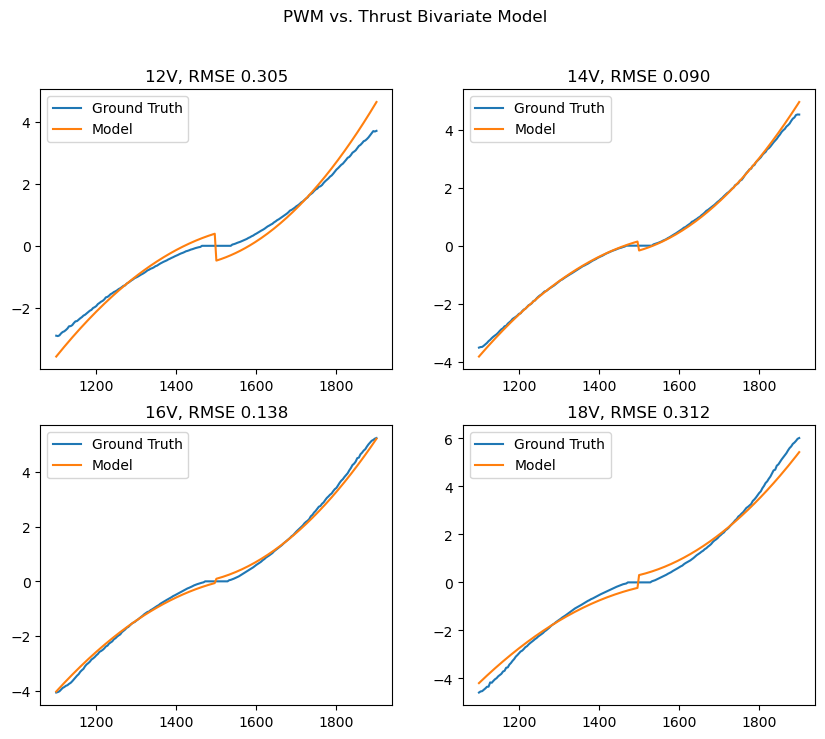

In [11]:
v_lvls = [12, 14, 16, 18]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.suptitle("PWM vs. Thrust Bivariate Model")
for r in range(len(axs)):
    for c in range(len(axs[r])):
        v_lvl_idx = 2*r + c
        v_lvl = v_lvls[v_lvl_idx]
        
        # Plot ground truth data 
        axs[r, c].plot(pwms[v_lvl], thrusts[v_lvl], label="Ground Truth")
        
        # Get model output
        model_outs = [fwd_bivar_model(pwm, v_lvl) for pwm in pwms[v_lvl]]            
        axs[r, c].plot(pwms[v_lvl], model_outs, label="Model")
        
        error = rmse(model_outs, thrusts[v_lvl])
        axs[r, c].set_title(f"{v_lvl}V, RMSE {error:.3f}")
        axs[r, c].legend()
plt.show()

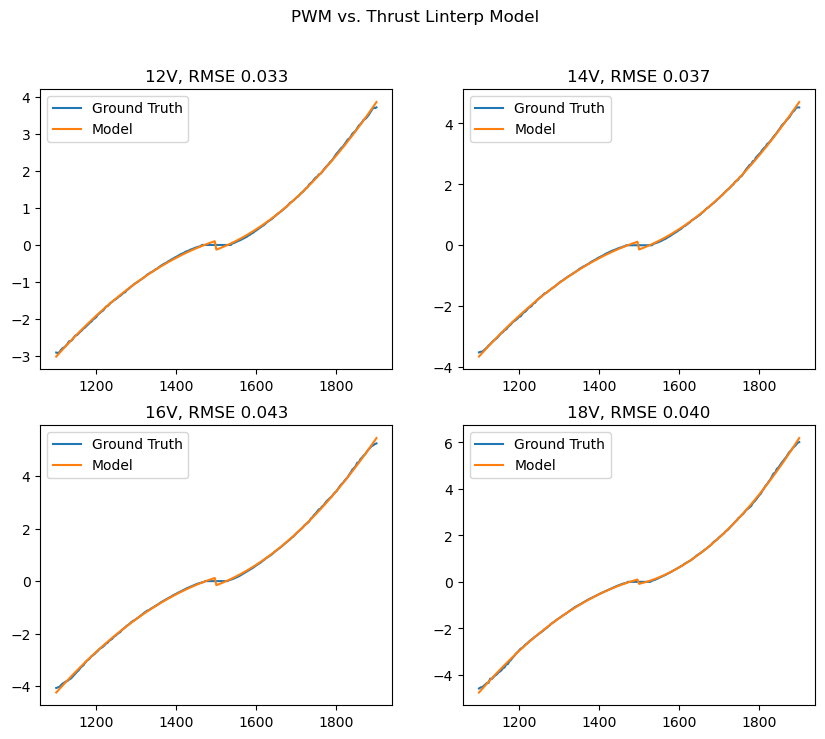

In [12]:
v_lvls = [12, 14, 16, 18]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.suptitle("PWM vs. Thrust Linterp Model")
for r in range(len(axs)):
    for c in range(len(axs[r])):
        v_lvl_idx = 2*r + c
        v_lvl = v_lvls[v_lvl_idx]
        
        # Plot ground truth data 
        axs[r, c].set_title(f"{v_lvl}V")
        axs[r, c].plot(pwms[v_lvl], thrusts[v_lvl], label="Ground Truth")
        
        # Get model output
        model_outs = [fwd_linterp_model(pwm, v_lvl) for pwm in pwms[v_lvl]]
        axs[r, c].plot(pwms[v_lvl], model_outs, label="Model")
        
        error = rmse(model_outs, thrusts[v_lvl])
        axs[r, c].set_title(f"{v_lvl}V, RMSE {error:.3f}")
        axs[r, c].legend()

plt.show()